In [1]:
# Import neccessary libraries
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# URL containing dataset from the natural bureau of statistics
url = 'https://www.nigerianstat.gov.ng/resource/road%20transport%20q1%202018.xlsx'

In [5]:
# Retrieve as file'q12018.xlsx'
urlretrieve(url, 'q12018.xlsx')

('q12018.xlsx', <http.client.HTTPMessage at 0x227b7532db0>)

In [7]:
# Load in Excel File
q1_2018 = pd.ExcelFile('q12018.xlsx')

In [8]:
# Output sheet names
print(q1_2018.sheet_names)

['Vehicle Population', 'Number Plate', 'Drivers License', 'RTC', 'Sex injured&killed in RTC', 'Vehicles involved in RTC', 'Cause of RTC']


### National Driver License Production on State Basis (1ST Quarter 2018)
* #### State: Name of the Nigerian state where driver’s licenses were produced.
* #### No_Issued: Total number of driver’s licenses issued in that state during Q1 2018.
* #### Percentage: Percentage share of the state’s production relative to the national total.

In [12]:
driv_lic = (q1_2018.parse('Drivers License', usecols=[1, 2, 3], 
                         names=['State', 'No_Issued', 'Percentage'], 
                         skiprows=[0, 39]))

In [14]:
driv_lic.head()

,State,No_Issued,Percentage
0,Abia,4991,2.237043
1,Adamawa,1585,0.710421
2,Akwa-Ibom,3310,1.483593
3,Anambra,7709,3.455293
4,Bauchi,3082,1.381400


In [16]:
# Check for missing values
driv_lic.isna().sum()

State         0
No_Issued     0
Percentage    0
dtype: int64

In [18]:
driv_lic.describe()['No_Issued']

count       37.000000
mean      6029.918919
std       9855.966750
min        410.000000
25%       1549.000000
50%       3152.000000
75%       6825.000000
max      57205.000000
Name: No_Issued, dtype: float64

In [20]:
drivlic_sorted = driv_lic.sort_values(by='No_Issued')

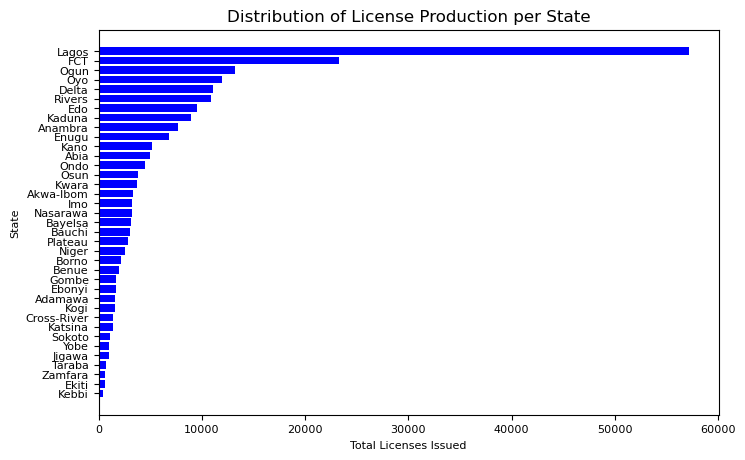

In [22]:
# Distribution of license produced per state
plt.figure(figsize=(8,5))
plt.barh(drivlic_sorted['State'], drivlic_sorted['No_Issued'], color='blue')
plt.xlabel('Total Licenses Issued', fontsize=8)
plt.ylabel('State', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.title('Distribution of License Production per State')
plt.savefig('driv-lic_prod.jpg')
plt.show();

In [24]:
max_count = driv_lic['No_Issued'].max()
min_count = driv_lic['No_Issued'].min()
max_state = driv_lic.loc[driv_lic['No_Issued']==max_count, 'State'].values[0]
min_state = driv_lic.loc[driv_lic['No_Issued']==min_count, 'State'].values[0]
print(f'State with highest Drivers License Issued: {max_state}')
print(f'State with lowest Drivers License Issued: {min_state}')

State with highest Drivers License Issued: Lagos
State with lowest Drivers License Issued: Kebbi


#### The top ten states by License Issued (Lagos, FCT, Ogun, Oyo, Delta, Rivers, Edo, Kaduna, Anambra, Enugu) are large urban and econmically active states with high vehicle density.

#### The least ten states (Kebbi, Ekiti, Zamfara, Taraba, Jigawa, Yobe, Sokoto, Katsina, Cross-river, Kogi) are likely due to lower urbanization, preference for unlicensed driving or weaker infrastructure

In [27]:
# Define a mapping of states to zones (From wikipedia)
zone_mapping = {
    # North Central
    "Benue": "North Central", "Kogi": "North Central", "Kwara": "North Central",
    "Nasarawa": "North Central", "Niger": "North Central", "Plateau": "North Central",
    "FCT": "North Central",

    # North East
    "Adamawa": "North East", "Bauchi": "North East", "Borno": "North East",
    "Gombe": "North East", "Taraba": "North East", "Yobe": "North East",

    # North West
    "Jigawa": "North West", "Kaduna": "North West", "Kano": "North West",
    "Katsina": "North West", "Kebbi": "North West", "Sokoto": "North West", "Zamfara": "North West",

    # South East
    "Abia": "South East", "Anambra": "South East", "Ebonyi": "South East",
    "Enugu": "South East", "Imo": "South East",

    # South South
    "Akwa-Ibom": "South South", "Bayelsa": "South South", "Cross-River": "South South",
    "Delta": "South South", "Edo": "South South", "Rivers": "South South",

    # South West
    "Ekiti": "South West", "Lagos": "South West", "Ogun": "South West",
    "Ondo": "South West", "Osun": "South West", "Oyo": "South West",
}

In [29]:
# Add column 'Zone'
driv_lic['Zone'] = driv_lic['State'].map(zone_mapping)

In [31]:
# Aggregate by 'Zone'
geo_zones = driv_lic.groupby('Zone')['No_Issued'].sum().reset_index()
geo_zones

,Zone,No_Issued
0,North Central,39150
1,North East,10222
2,North West,18634
3,South East,24500
4,South South,39312
5,South West,91289


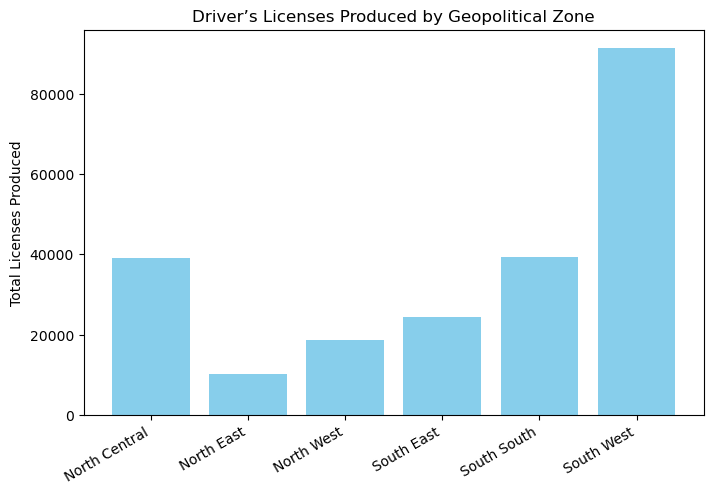

In [33]:
plt.figure(figsize=(8,5))
plt.bar(geo_zones["Zone"], geo_zones["No_Issued"], color="skyblue")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Total Licenses Produced")
plt.title("Driver’s Licenses Produced by Geopolitical Zone")
plt.savefig('zone_dist.jpg')
plt.show()

#### Policy Implication: Efforts to expand driver's license infrastructure should target zones(North East, North West).

#### Ecomic correlation: States with higher industrial/commercial activity tend to have higher driver's license numbers.

In [36]:
driv_lic.to_csv('drivers_license.csv')